# Chapter 2: End-to-End Machine Learning Project

Exercises
The following exercises are all based on this chapter’s housing dataset:<br/>
<ol>
<li>Try a Support Vector Machine regressor (sklearn.svm.SVR) with various hyperparameters,
such as kernel="linear (with various values for the C hyperparameter)
or kernel="rbf (with various values for the C and gamma
hyperparameters). Don’t worry about what these hyperparameters mean for now.
How does the best SVR predictor perform?</li>
<li>Try replacing GridSearchCV with RandomizedSearchCV.</li>
<li>Try adding a transformer in the preparation pipeline to select only the most
important attributes.</li>
<li>Try creating a single pipeline that does the full data preparation plus the final
prediction.</li>
<li>Automatically explore some preparation options using GridSearchCV</li>
<ol>

## Get data


Dataset gathered from kaggle<br/>

**Health insurance cross sell prediction** - https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction?select=train.csv

## Data preproccesing

In [ ]:
import pandas as pd

path = '../data/'
file = 'heart.csv'
file2 = 'o2saturation.csv'

df = pd.read_csv(path + file)
df2 = pd.read_csv(path + file2)

**Visualizing the data**

In [ ]:
df.head()

In [ ]:
df.describe()

In [ ]:
import matplotlib.pyplot as plt


df.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

print(train_set.shape, test_set.shape)

Stratified sampling:<br/>

Taking cholesterol variable as important one

In [ ]:
import numpy as np
df["chol_cat"] = pd.cut(df["chol"],
bins=[0, 211, 246, 274, 564],
labels=[1, 2, 3, 4])

<AxesSubplot:>

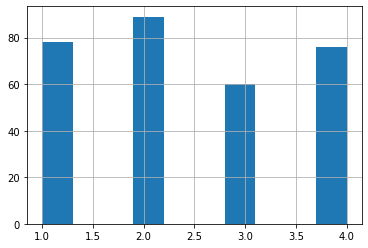

In [62]:
df["chol_cat"].hist()

In [63]:
df['chol_cat'].value_counts(normalize=True)

2    0.293729
1    0.257426
4    0.250825
3    0.198020
Name: chol_cat, dtype: float64

stratified sampling based on the income category

In [61]:
strat_train_set, strat_test_set = train_test_split(
    df, test_size=0.2, random_state=42, stratify=df["chol_cat"])

In [65]:
strat_test_set["chol_cat"].value_counts() / len(strat_test_set)

2    0.295082
1    0.262295
4    0.245902
3    0.196721
Name: chol_cat, dtype: float64

Removing categorical attribute, so data is back to its original state

In [66]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("chol_cat", axis=1, inplace=True)

C:\Users\andres.mitre\Anaconda3\envs\indicadores\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [67]:
df_new = strat_train_set.copy()
df_new.head()

,index,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
129,129.0,74.0,0.0,1.0,120.0,269.0,0.0,0.0,121.0,1.0,0.2,2.0,1.0,2.0,1.0
89,89.0,58.0,0.0,0.0,100.0,248.0,0.0,0.0,122.0,0.0,1.0,1.0,0.0,2.0,1.0
164,164.0,38.0,1.0,2.0,138.0,175.0,0.0,1.0,173.0,0.0,0.0,2.0,4.0,2.0,1.0
194,194.0,60.0,1.0,2.0,140.0,185.0,0.0,0.0,155.0,0.0,3.0,1.0,0.0,2.0,0.0
221,221.0,55.0,1.0,0.0,140.0,217.0,0.0,1.0,111.0,1.0,5.6,0.0,0.0,3.0,0.0


In [71]:
corr_matrix = df_new.corr()

In [75]:
corr_matrix["thalachh"].sort_values(ascending=False)

thalachh    1.000000
output      0.395158
slp         0.376792
cp          0.324059
restecg     0.045782
trtbps     -0.035637
fbs        -0.035865
thall      -0.057247
chol       -0.059640
sex        -0.067300
caa        -0.219305
oldpeak    -0.316929
exng       -0.378369
age        -0.384439
index      -0.390753
Name: thalachh, dtype: float64

In [77]:
df_new.reset_index(drop=True, inplace=True)

array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='oldpeak', ylabel='age'>,
        <AxesSubplot:xlabel='caa', ylabel='age'>,
        <AxesSubplot:xlabel='chol', ylabel='age'>,
        <AxesSubplot:xlabel='fbs', ylabel='age'>,
        <AxesSubplot:xlabel='trtbps', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='oldpeak'>,
        <AxesSubplot:xlabel='oldpeak', ylabel='oldpeak'>,
        <AxesSubplot:xlabel='caa', ylabel='oldpeak'>,
        <AxesSubplot:xlabel='chol', ylabel='oldpeak'>,
        <AxesSubplot:xlabel='fbs', ylabel='oldpeak'>,
        <AxesSubplot:xlabel='trtbps', ylabel='oldpeak'>],
       [<AxesSubplot:xlabel='age', ylabel='caa'>,
        <AxesSubplot:xlabel='oldpeak', ylabel='caa'>,
        <AxesSubplot:xlabel='caa', ylabel='caa'>,
        <AxesSubplot:xlabel='chol', ylabel='caa'>,
        <AxesSubplot:xlabel='fbs', ylabel='caa'>,
        <AxesSubplot:xlabel='trtbps', ylabel='caa'>],
       [<AxesSubplot:xlabel='age', ylabel='chol'>

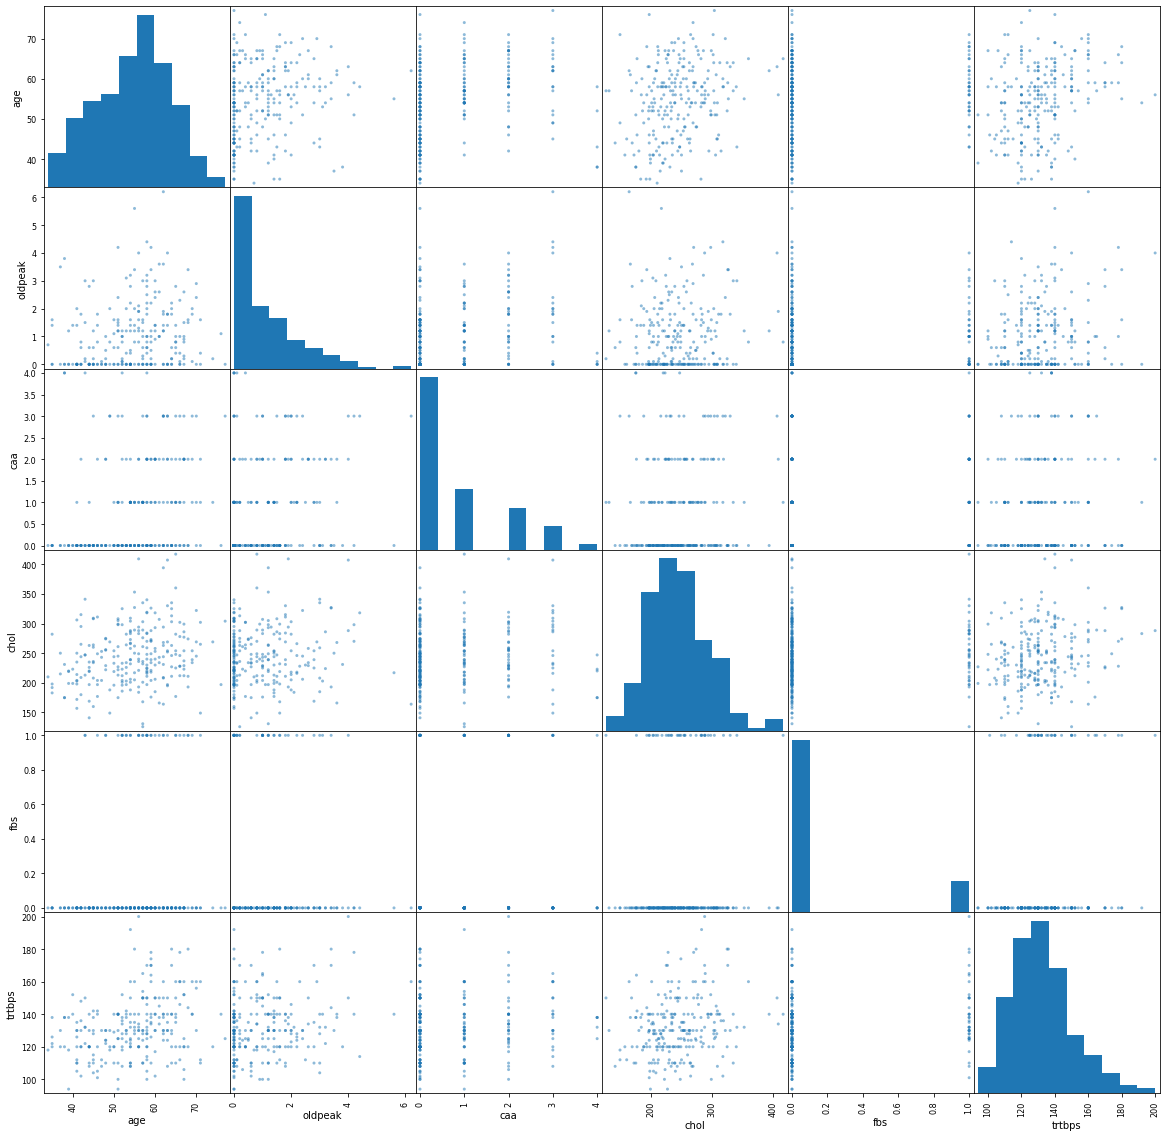

In [84]:
from pandas.plotting import scatter_matrix

col_list =['age','oldpeak','caa','chol','fbs','trtbps']
scatter_matrix(df_new[col_list], figsize=(20,20))

In [86]:
df_new['chol/age'] = df_new['chol']/df_new['age']
corr_matrix = df_new.corr()
corr_matrix["thalachh"].sort_values(ascending=False)

thalachh    1.000000
output      0.395158
slp         0.376792
cp          0.324059
chol/age    0.223336
restecg     0.045782
trtbps     -0.035637
fbs        -0.035865
thall      -0.057247
chol       -0.059640
sex        -0.067300
caa        -0.219305
oldpeak    -0.316929
exng       -0.378369
age        -0.384439
index      -0.390753
Name: thalachh, dtype: float64

In [89]:
df_new.head()

,index,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,chol/age
0,129.0,74.0,0.0,1.0,120.0,269.0,0.0,0.0,121.0,1.0,0.2,2.0,1.0,2.0,1.0,3.635135
1,89.0,58.0,0.0,0.0,100.0,248.0,0.0,0.0,122.0,0.0,1.0,1.0,0.0,2.0,1.0,4.275862
2,164.0,38.0,1.0,2.0,138.0,175.0,0.0,1.0,173.0,0.0,0.0,2.0,4.0,2.0,1.0,4.605263
3,194.0,60.0,1.0,2.0,140.0,185.0,0.0,0.0,155.0,0.0,3.0,1.0,0.0,2.0,0.0,3.083333
4,221.0,55.0,1.0,0.0,140.0,217.0,0.0,1.0,111.0,1.0,5.6,0.0,0.0,3.0,0.0,3.945455


In [91]:
from sklearn.preprocessing import OrdinalEncoder,  OneHotEncoder
ordinal_encoder = OrdinalEncoder()
cat_encoder = OneHotEncoder()

#sex_cat_encoded = ordinal_encoder.fit_transform(df_new['sex'])
#fbs_cat_encoded = ordinal_encoder.fit_transform(df_new['fbs'])
#restecg_cat_encoded = ordinal_encoder.fit_transform(df_new['restecg'])
#cp_cat_1hot = cat_encoder.fit_transform(df_new['cp'])
#cp_cat_1hot

## Transformation pipeline

In [ ]:
from sklearn.pipeline import Pipeline


class data_transformation:
    def __init__(self,dataset):
        self.dataset = dataset
        
    def transform(self, )